In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import os

In [2]:
#armar colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.Greens_r(np.linspace(0,0.75,256))
cols = np.vstack((c_agua, c_terr))
cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)

### Analizar un unico archivo .grd y una boya

In [48]:
#archivo nc (grd) a cargar
nc_file=r"G:\My Drive\UTFSM\memoria\tareas\tarea02\HySea\bat_l4_vinavalpo_conf1.grd"
#coordenadas del mareografo
x_mareografo, y_mareografo=288.3722, -33.02778

KeysView(<xarray.Dataset>
Dimensions:  (x: 1776, y: 752)
Coordinates:
  * x        (x) float64 288.4 288.4 288.4 288.4 ... 288.5 288.5 288.5 288.5
  * y        (y) float64 -33.05 -33.05 -33.05 -33.05 ... -33.0 -33.0 -33.0 -33.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        bat_l4_vinavalpo_conf1.grd
    history:      File written by MATLAB function grdwrite2.m
    description:  Created 15-May-2018 11:14:39
    GMT_version:  4.x)

Espaciamiento
 dx [arcseg]:  0.2342430320946714
 dy [arcseg]:  0.23406333111701674

Limites en x e y
 x:  288.360961914063   288.4765218098964
 y:  -33.051529439290334   -33.00263621012367


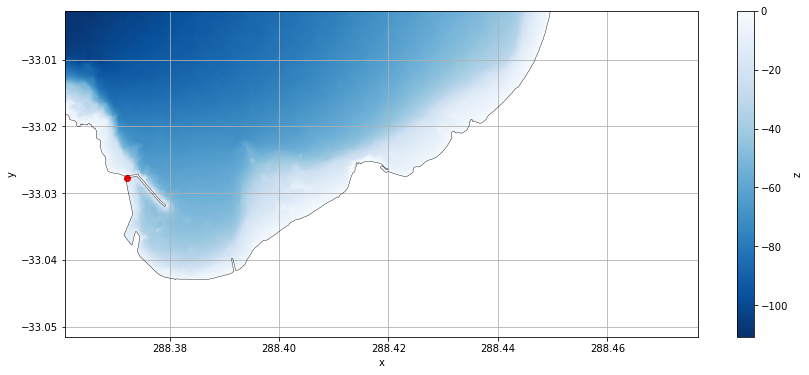

Prof. mareografo:  -4.497575412186732


In [49]:
# ver contenidos archivo nc (grd)
data_nc=xr.open_dataset(nc_file)

with data_nc as ds:
  print(ds.keys()) # muestra contenido del archivo .grd

print()
print('Espaciamiento')
print(' dx [arcseg]: ',np.abs(data_nc.x.values[-1]-data_nc.x.values[0])*3600/(len(data_nc.x.values)))
print(' dy [arcseg]: ',np.abs(data_nc.y.values[-1]-data_nc.y.values[0])*3600/(len(data_nc.y.values)))
print()
print('Limites en x e y')
print(' x: ',data_nc.x.min().values,' ',data_nc.x.max().values)
print(' y: ',data_nc.y.min().values,' ',data_nc.y.max().values)


#profundidad de la ubicacion de la boya
z_boya=data_nc.z.sel(x=x_mareografo,y=y_mareografo,method="nearest").values.item()

#Plotear batimetria
variable=data_nc.z.where(data_nc.z<=0)

#divnorm = cm.colors.DivergingNorm(vmin=data_nc.deformed_bathy.min(), vcenter=0, vmax=data_nc.deformed_bathy.max())

variable.plot.imshow(aspect=ds.dims['x'] / ds.dims['y'],size=6,cmap='Blues_r')
                          #,cmap=cmap,norm=divnorm)   #variable de interes
data_nc.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4) #curva de nivel 0 y 200m
plt.scatter(x_mareografo,y_mareografo,color="r")

plt.grid()
plt.show()
#plt.savefig(nombre_archivo+'_'+nombre_variable+'.png',dpi=300) !!!!Falta arreglar nonmbre de archivo

print('Prof. mareografo: ',z_boya)

### Plotear dominios y mareografos

In [3]:
# grilla de base(la mas grande)
grd_base=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l2_quin2sano_sinmolo_3sa.grd"

#grillas anidadas
grd_1=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l3_cart2sano_1sa.grd"
grd_2=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l3_quin2sano_3sa.grd"
grd_3=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l3_quin2valpo_1sa.grd"
grd_4=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l4_concon_4m.grd"
grd_5=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l4_quintero_5m_v2.grd"
grd_6=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l4_sano_4m.grd"
grd_7=r"G:\My Drive\UTFSM\memoria\batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1\V-Vina-Valpo-ConCon-SanAntonio_v3_gebco2019\bat_l4_vinavalpo_conmolo_4m.grd"

batis=[grd_base,grd_1,grd_2,grd_3,grd_4,grd_5,grd_6,grd_7] #aqui anotar las variables a plotear, la primera debe ser la batimetria de base

In [9]:
# Mareografos:
#Lee la ubicacion de los mareografos desde un archivo ts.xy

# Lee archivo ts.xy
ts_file=r"G:\My Drive\UTFSM\memoria\tareas\deformaciones_nati\ts_zcentro.xy"

coords=[] # aqui se guardaran las coordenadas del archivo .xy
with open(ts_file, 'r') as reader: # abre el archivo
    for line in reader.readlines()[1:]: # para cada linea, saltandose la primera
        line = line.replace('\n','') # reemplaza saltos de linea por espacios en blanco
        line=line.rsplit(sep=' ') # Separa la linea en donde haya espacios
        coords.append(line) #agrega las coordenadas (texto a la lista coords)

coords=np.array(coords) # transforma la lista a formato np.array
coords=coords.astype(np.float) # pasa de sting a numero (float)

etiquetas=['coqu','ptal','pich','qtro','valp','sano'] # etiquetas o ubicaciones de los mareografos a plotear (en orden)

bat_l2_quin2sano_sinmolo_3sa.grd
 dx [arcseg]:  2.998246639392192
 dy [arcseg]:  2.998611753817684

bat_l3_cart2sano_1sa.grd
 dx [arcseg]:  0.9995372512725968
 dy [arcseg]:  0.999306037473973

bat_l3_quin2sano_3sa.grd
 dx [arcseg]:  2.998246639392192
 dy [arcseg]:  2.998611753817684

bat_l3_quin2valpo_1sa.grd
 dx [arcseg]:  0.9994447529150472
 dy [arcseg]:  0.9994660971703211

bat_l4_concon_4m.grd
 dx [arcseg]:  0.1446107353199573
 dy [arcseg]:  0.14458250830562752

bat_l4_quintero_5m_v2.grd
 dx [arcseg]:  0.18074087807298836
 dy [arcseg]:  0.1806964395154772

bat_l4_sano_4m.grd
 dx [arcseg]:  0.1453804037478315
 dy [arcseg]:  0.14537501125960942

bat_l4_vinavalpo_conmolo_4m.grd
 dx [arcseg]:  0.1447713416386486
 dy [arcseg]:  0.14475564686530165



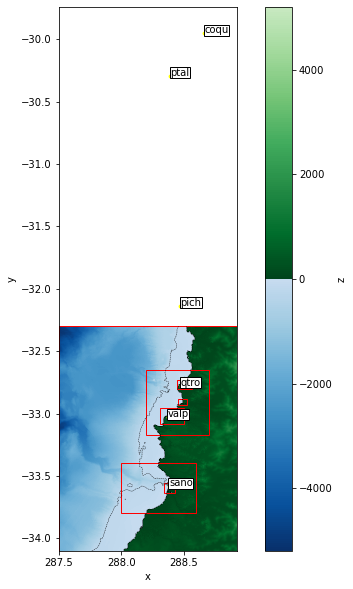

In [10]:
data_base=xr.open_dataset(grd_base) # carga batimetria de base (la mas grande)

fig,ax1=plt.subplots(figsize=(10,10)) # genera figura en donde iran los dibujos
data_base.z.plot.imshow(cmap=cmap,ax=ax1) # plotea batimetria de base, en ax1
data_base.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.4,ax=ax1) #plotea linea de costa y curva de nivel -200

print(os.path.basename(batis[0]))
print(' dx [arcseg]: ',np.abs(data_base.x.values[-1]-data_base.x.values[0])*3600/(len(data_base.x.values)))
print(' dy [arcseg]: ',np.abs(data_base.y.values[-1]-data_base.y.values[0])*3600/(len(data_base.y.values)))
print()

for i in range(1,len(batis)): # para cada bati de la lista (saltandose el primero)
    data_nc=xr.open_dataset(batis[i]) # carga la bati
    
    # Aqui se definen las caracteristicas principales del rectangulo
    inf_izq=[data_nc.x.values[0],data_nc.y.values[-1]] # coordenada inferior izquierda
    ancho=data_nc.x.values[-1]-data_nc.x.values[0] # ancho del rectangulo
    alto=data_nc.y.values[0]-data_nc.y.values[-1] # alto del rectangulo
    
    rect=patches.Rectangle((inf_izq[0],inf_izq[1]),ancho,alto,linewidth=1,edgecolor='r',facecolor='none') #genera el rectangulo
    ax1.add_patch(rect) # plotea el rectangulo, en ax1
    
    print(os.path.basename(batis[i]))
    print(' dx [arcseg]: ',np.abs(data_nc.x.values[-1]-data_nc.x.values[0])*3600/(len(data_nc.x.values)))
    print(' dy [arcseg]: ',np.abs(data_nc.y.values[-1]-data_nc.y.values[0])*3600/(len(data_nc.y.values)))
    print()
    
ax1.scatter(coords[:,0],coords[:,1],c='yellow',s=8) # plotea mareografos de archivo .xy en ax1

for etiqueta, x, y in zip(etiquetas, coords[:, 0], coords[:, 1]): #agregar etiquetas, lo encontre en internet
    plt.annotate(etiqueta,xy=(x, y),bbox=dict(boxstyle='square,pad=0.05',fc='white')) # falta afinar la ubicacion de las etiquetas

ax1.set_aspect('equal') # lo deja en la misma escala horizontal y vertical
plt.show() # muestra el ploteo
